<a href="https://colab.research.google.com/github/shivams289/Projects/blob/main/Quantile_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


In [2]:
plt.rcParams["figure.figsize"] = (15,10)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataverse_files/quantile_raw.csv')

In [4]:
#The shape is different than used in research paper for visualising the summar statistics
df.shape

(821788, 21)

In [5]:
df.dtypes

t              object
k200          float64
k200volume    float64
k200_wn       float64
fprc          float64
fvolume       float64
f_wn          float64
vkospi        float64
iv1           float64
iv2           float64
iv2_Call      float64
iv2_put       float64
iv2_itm       float64
iv2_atm       float64
iv2_otm       float64
iv3           float64
iv3_Call      float64
iv3_put       float64
iv3_itm       float64
iv3_atm       float64
iv3_otm       float64
dtype: object

In [6]:
df.tail()

,t,k200,k200volume,k200_wn,fprc,fvolume,f_wn,vkospi,iv1,iv2,iv2_Call,iv2_put,iv2_itm,iv2_atm,iv2_otm,iv3,iv3_Call,iv3_put,iv3_itm,iv3_atm,iv3_otm
821783,2014-06-30 14:45,259.74,338028.0,1.211954e+10,261.00,352.0,4.592970e+10,11.43,11.255505,12.104030,11.144871,12.988356,10.339740,11.222134,15.554194,11.964249,11.309614,12.487957,10.339740,11.140952,13.143596
821784,2014-06-30 14:46,259.80,269469.0,1.332567e+10,261.05,403.0,5.259748e+10,11.43,11.254810,12.797122,11.201223,13.370091,11.402770,11.378318,14.701047,12.189117,11.614499,12.607020,11.787710,11.269368,12.945178
821785,2014-06-30 14:47,259.84,270233.0,1.073104e+10,261.05,89.0,1.161628e+10,11.43,11.253475,11.988567,11.180144,12.709638,11.183530,11.266521,12.867106,12.411483,10.935508,13.395467,11.183530,11.232810,13.341104
821786,2014-06-30 14:48,259.79,301194.0,1.404962e+10,261.10,244.0,3.184825e+10,11.43,11.282830,11.674133,11.342516,11.821988,11.854567,11.437754,13.193093,12.052906,11.347634,12.711159,11.854567,11.178431,12.733855
821787,2014-06-30 14:49,259.84,282061.0,1.153990e+10,261.05,56.0,7.310375e+09,11.42,11.281265,13.425511,11.057042,14.593355,10.890732,11.255395,15.183325,11.977344,11.114040,12.792687,11.762560,11.270991,12.507908


In [7]:
df['Dates'] = pd.to_datetime(df['t']).dt.date
df['Time'] = pd.to_datetime(df['t']).dt.time

In [8]:
#set(df['Time'])

In [9]:
df.isnull().sum()


t                  0
k200             289
k200volume       289
k200_wn          289
fprc             289
fvolume          289
f_wn             289
vkospi        391461
iv1                0
iv2                0
iv2_Call           0
iv2_put            0
iv2_itm        78801
iv2_atm           26
iv2_otm            1
iv3                0
iv3_Call           0
iv3_put            0
iv3_itm        78801
iv3_atm           26
iv3_otm            1
Dates              0
Time               0
dtype: int64

In [10]:
#df

In [11]:
plt.style.use('fivethirtyeight')

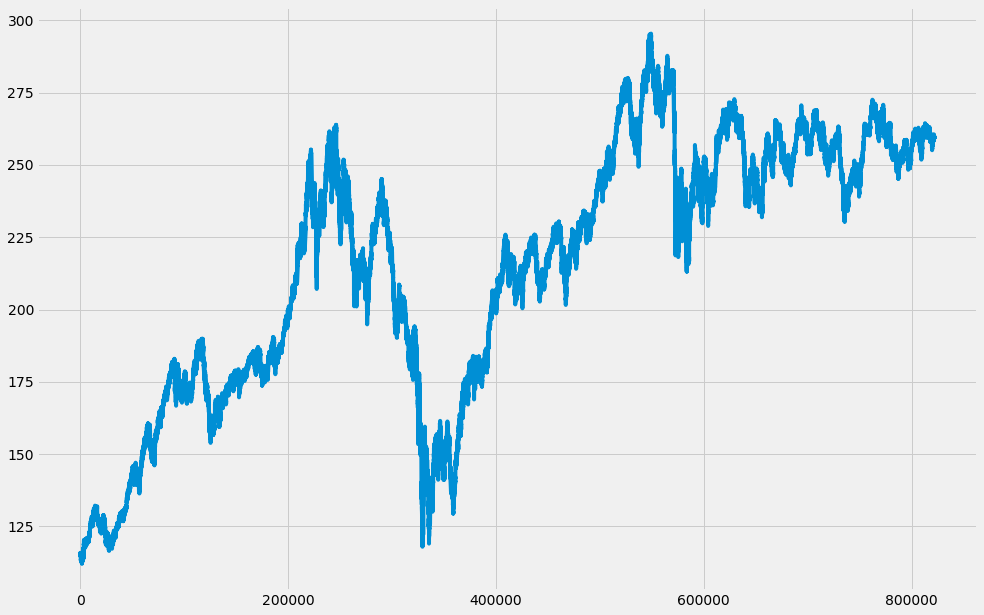

In [12]:
plt.plot(df['k200'])

In [13]:
dff = df[['Dates','Time', 'k200', 'k200volume','fvolume', 'iv2' ]]

In [14]:
dff.isnull().sum()

Dates           0
Time            0
k200          289
k200volume    289
fvolume       289
iv2             0
dtype: int64

In [15]:
dff.dropna(axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
dff.isnull().sum()

Dates         0
Time          0
k200          0
k200volume    0
fvolume       0
iv2           0
dtype: int64

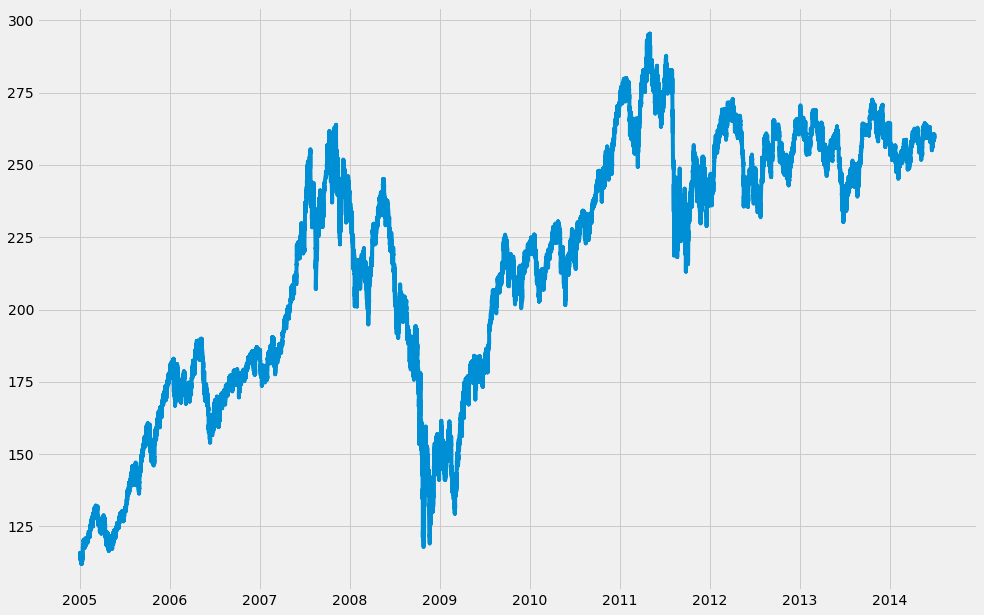

In [17]:

plt.plot(dff['Dates'], dff['k200'])

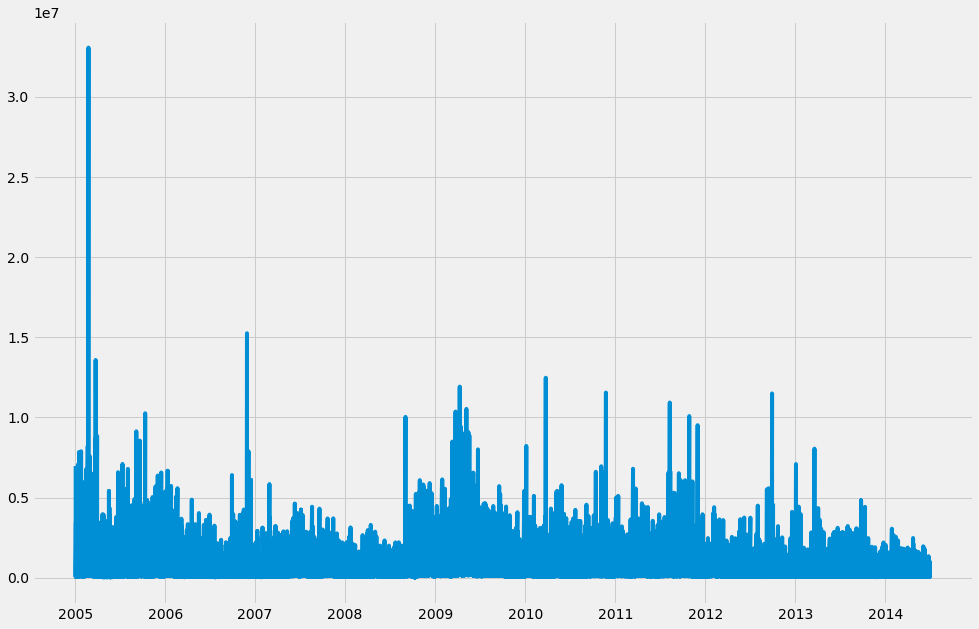

In [18]:
plt.plot(dff['Dates'], dff['k200volume'])

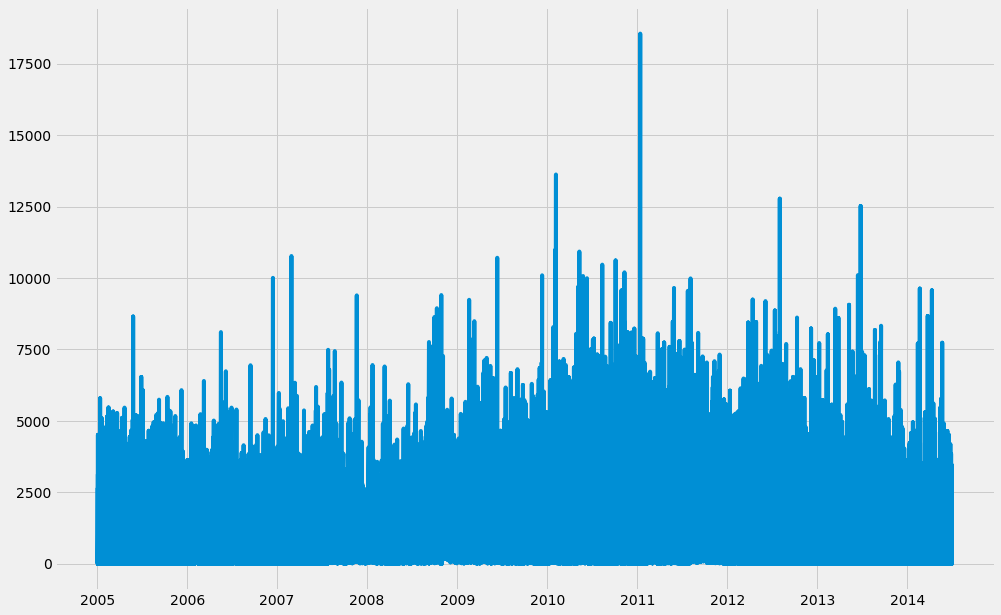

In [19]:
plt.plot(dff['Dates'], dff['fvolume'])

In [20]:
dff['r'] = (dff['k200'].shift(-1) - dff['k200'])/dff['k200'] *100
dff['lsv'] = np.log(dff['k200volume'])
dff['lfv'] = np.log(dff['fvolume'])
dff['div'] = (dff['iv2'].shift(-1) - dff['iv2'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWit

In [21]:
dff_check = dff.dropna(axis = 0)
dff_check

,Dates,Time,k200,k200volume,fvolume,iv2,r,lsv,lfv,div
0,2005-01-03,10:01:00,115.65,6971224.0,2658.0,28.419010,-0.095115,15.757301,7.885329,-5.346735
1,2005-01-03,10:02:00,115.54,915131.0,1486.0,23.072276,-0.103860,13.726823,7.303843,-0.554828
2,2005-01-03,10:03:00,115.42,771750.0,1214.0,22.517448,0.112632,13.556416,7.101676,-0.829135
3,2005-01-03,10:04:00,115.55,991206.0,1876.0,21.688313,0.043271,13.806678,7.536897,0.677726
4,2005-01-03,10:05:00,115.60,1053666.0,2064.0,22.366039,-0.242215,13.867786,7.632401,0.328027
...,...,...,...,...,...,...,...,...,...,...
821782,2014-06-30,14:44:00,259.63,324734.0,61.0,12.020005,0.042368,12.690762,4.110874,0.084025
821783,2014-06-30,14:45:00,259.74,338028.0,352.0,12.104030,0.023100,12.730884,5.863631,0.693092
821784,2014-06-30,14:46:00,259.80,269469.0,403.0,12.797122,0.015396,12.504209,5.998937,-0.808555
821785,2014-06-30,14:47:00,259.84,270233.0,89.0,11.988567,-0.019243,12.507040,4.488636,-0.314433


In [22]:

df_final = dff_check[['r', 'lsv', 'lfv', 'div']]

In [23]:
df_final.describe(percentiles=[0.01, 0.05, 0.25, 0.75, 0.95, 0.99])

,r,lsv,lfv,div
count,821498.000000,8.214980e+05,821498.000000,821498.000000
mean,0.000127,-inf,5.972289,-0.000018
std,0.075223,NaN,1.125248,1.633935
min,-6.522082,-inf,0.000000,-34.178617
1%,-0.159279,1.123734e+01,2.302585,-4.684542
5%,-0.074766,1.150551e+01,3.850148,-2.372367
25%,-0.024831,1.197036e+01,5.411646,-0.651500
50%,0.000000,1.235502e+01,6.111467,-0.006164
75%,0.024709,1.277513e+01,6.721426,0.643790
95%,0.075755,1.343020e+01,7.521318,2.383271


In [24]:
#Make infinite values 0 as volumes at those points were 0

df_final.replace([np.inf, -np.inf], np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [25]:
df_final.dropna(axis =0, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_final.describe(percentiles=[0.01, 0.05, 0.25, 0.75, 0.95, 0.99])

,r,lsv,lfv,div
count,821496.000000,821496.000000,821496.000000,821496.000000
mean,0.000127,12.397457,5.972285,-0.000026
std,0.075222,0.594234,1.125247,1.633906
min,-6.522082,10.280347,0.000000,-34.178617
1%,-0.159263,11.237343,2.302585,-4.684548
5%,-0.074765,11.505516,3.850148,-2.372332
25%,-0.024831,11.970369,5.411646,-0.651497
50%,0.000000,12.355018,6.111467,-0.006164
75%,0.024709,12.775130,6.721426,0.643788
95%,0.075755,13.430202,7.521318,2.383261


In [27]:
#sns.distplot(a=df_final['lsv'])

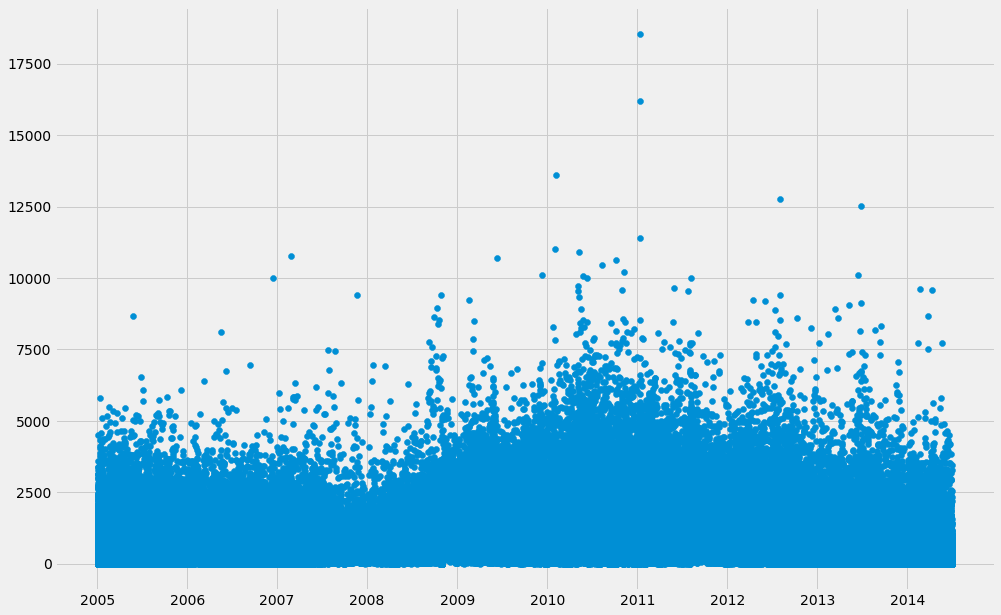

In [28]:
plt.scatter(df['Dates'], df['fvolume'])

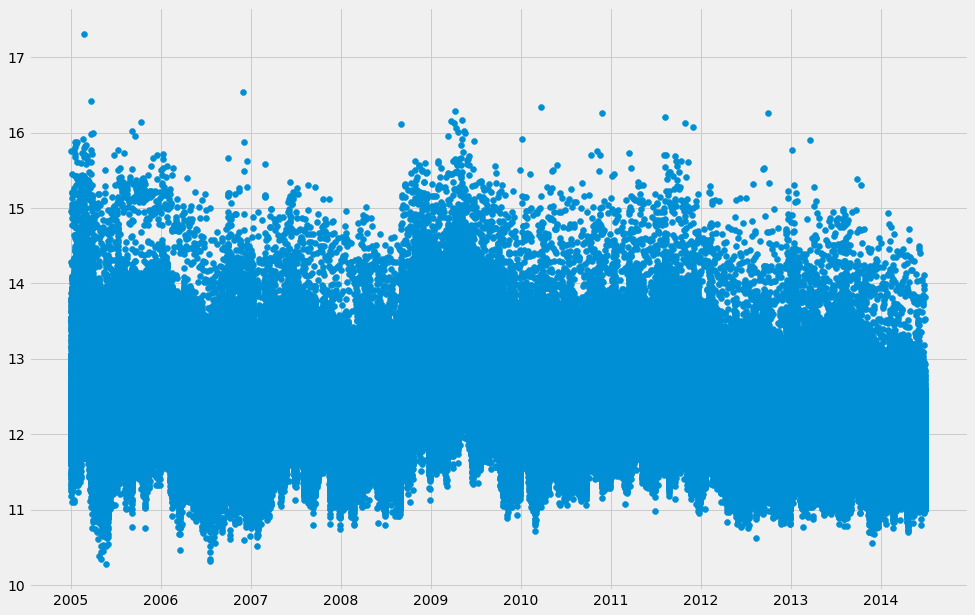

In [29]:
plt.scatter(dff_check['Dates'], dff_check['lsv'])

In [30]:
# Timings of peak morning and afternoon sessions
from datetime import time
start1 = time(9,0) 
end1 = time(10,0) 
start2 = time(13,50) 
end2 = time(14,50)

In [31]:
#Dummy var to induce effect of morning and afternoon peak timing

DOP_t = dff_check['Time'].apply(lambda x:1 if x>=start1 and x<end1 else 0) 
DCL_t = dff_check['Time'].apply(lambda x:1 if x>=start2 and x<end2 else 0)


In [32]:
print(len(DOP_t))
print(len(DCL_t))

821498
821498


In [33]:
df_final['DOP_t'] = DOP_t
df_final['DCL_t'] = DCL_t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
#All Models

rt_1 = df_final['r'].shift(1)
rt_2 = df_final['r'].shift(2)
rt_3 = df_final['r'].shift(3)
t_T = [i/len(df_final) for i in range(len(df_final))]

In [35]:
#Model A
lsvt_1 = df_final['lsv'].shift(1)
lsvt_2 = df_final['lsv'].shift(2)
lsvt_3 = df_final['lsv'].shift(3)

In [36]:
#Model B
lfvt_1 = df_final['lfv'].shift(1)
lfvt_2 = df_final['lfv'].shift(2)
lfvt_3 = df_final['lfv'].shift(3)

In [37]:
#Model C
fst_1 = lfvt_1 - lsvt_1
fst_2 = lfvt_2 - lsvt_2
fst_3 = lfvt_3 - lsvt_3

In [38]:
df_final['rt_1'] = rt_1
df_final['rt_2'] = rt_2
df_final['rt_3'] = rt_3
df_final['t_T'] = t_T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [39]:
df_final_A = df_final
df_final_B = df_final
df_final_C = df_final

In [40]:
#Model A
df_final_A['lsvt_1'] = lsvt_1
df_final_A['lsvt_2'] = lsvt_2
df_final_A['lsvt_3'] = lsvt_3

#Model B
df_final_B['lfvt_1'] = lfvt_1
df_final_B['lfvt_2'] = lfvt_2
df_final_B['lfvt_3'] = lfvt_3

#Model C
df_final_C['fst_1'] = fst_1
df_final_C['fst_2'] = fst_2
df_final_C['fst_3'] = fst_3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [41]:
df_final_A.drop(['lsv', 'lfv'], axis =1, inplace = True)
df_final_B.drop(['lsv', 'lfv'], axis =1, inplace = True)
df_final_C.drop(['lsv', 'lfv'], axis =1, inplace = True)



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


KeyError: ignored

In [42]:
df_final_A

,r,div,DOP_t,DCL_t,rt_1,rt_2,rt_3,t_T,lsvt_1,lsvt_2,lsvt_3,lfvt_1,lfvt_2,lfvt_3,fst_1,fst_2,fst_3
0,-0.095115,-5.346735,0,0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.103860,-0.554828,0,0,-0.095115,NaN,NaN,0.000001,15.757301,NaN,NaN,7.885329,NaN,NaN,-7.871972,NaN,NaN
2,0.112632,-0.829135,0,0,-0.103860,-0.095115,NaN,0.000002,13.726823,15.757301,NaN,7.303843,7.885329,NaN,-6.422979,-7.871972,NaN
3,0.043271,0.677726,0,0,0.112632,-0.103860,-0.095115,0.000004,13.556416,13.726823,15.757301,7.101676,7.303843,7.885329,-6.454740,-6.422979,-7.871972
4,-0.242215,0.328027,0,0,0.043271,0.112632,-0.103860,0.000005,13.806678,13.556416,13.726823,7.536897,7.101676,7.303843,-6.269781,-6.454740,-6.422979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821782,0.042368,0.084025,0,1,-0.023104,-0.023099,0.057781,0.999994,12.726368,12.393871,12.389722,5.283204,5.545177,5.204007,-7.443165,-6.848693,-7.185716
821783,0.023100,0.693092,0,1,0.042368,-0.023104,-0.023099,0.999995,12.690762,12.726368,12.393871,4.110874,5.283204,5.545177,-8.579888,-7.443165,-6.848693
821784,0.015396,-0.808555,0,1,0.023100,0.042368,-0.023104,0.999996,12.730884,12.690762,12.726368,5.863631,4.110874,5.283204,-6.867253,-8.579888,-7.443165
821785,-0.019243,-0.314433,0,1,0.015396,0.023100,0.042368,0.999998,12.504209,12.730884,12.690762,5.998937,5.863631,4.110874,-6.505272,-6.867253,-8.579888


In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
quantiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99]

In [37]:
mod = smf.quantreg("r ~ div+lsv+lfv+DOP_t+DCL_t", df_final)
res = mod.fit(q=0.01)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      r   Pseudo R-squared:               0.1165
Model:                       QuantReg   Bandwidth:                    0.003377
Method:                 Least Squares   Sparsity:                        3.890
Date:                Mon, 27 Sep 2021   No. Observations:               821498
Time:                        05:35:43   Df Residuals:                   821492
                                        Df Model:                            5
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6952      0.013     52.502      0.000       0.669       0.721
div           -0.0031      0.000     -7.441      0.000      -0.004      -0.002
lsv           -0.0622      0.001    -57.797      0.000      -0.064      -0.060
lfv           -0.0114      0.001    -21.415      0.0

In [ ]:
'''def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params["Intercept"], res.params["income"]] + res.conf_int().loc[
        "income"
    ].tolist()


models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b", "lb", "ub"])'''

In [ ]:
print(models

In [ ]:
pip uninstall scikit-learn

In [ ]:
pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

In [34]:
from sklearn.linear_model import QuantileRegressor

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error